In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

In [112]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Set the warning filter to "ignore" to suppress all warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
train_identity = pd.read_csv("train_identity.csv")
train_transaction = pd.read_csv("train_transaction.csv")

test_transaction = pd.read_csv('test_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')

print(f'Shape of transaction train data: {train_transaction.shape}')
print(f'Shape of identity train data: {train_identity.shape}')

print(f'Shape of transaction test data: {test_transaction.shape}')
print(f'Shape of identity tes data: {test_identity.shape}')

Shape of transaction train data: (590540, 394)
Shape of identity train data: (144233, 41)
Shape of transaction test data: (506691, 393)
Shape of identity tes data: (141907, 41)


In [6]:
pd.set_option('display.max_columns',394)
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [7]:
pd.set_option('display.max_columns',394)
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [8]:
merged_train = pd.merge(train_transaction,train_identity, on = "TransactionID", how="left")
print(f'Shape of merged train data: {merged_train.shape}')

Shape of merged train data: (590540, 434)


In [9]:
merged_test = pd.merge(test_transaction,test_identity,on=['TransactionID'],how='left')
print(f'Shape of merged test data: {merged_test.shape}')

Shape of merged test data: (506691, 433)


In [101]:
cat_features = ['ProductCD','card4','card6', 'P_emaildomain', 'R_emaildomain',
                'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 'id_15',
                'id_16','id_23','id_27','id_28','id_29','id_30','id_31',
                'id_33','id_34','id_35','id_36','id_37','id_38']

num_features = [x for x in merged_train.columns.values[2:] if x not in cat_features]  #slicing from 2 onwards ( first 2 columns are identifier and target)

features = num_features + cat_features

print('Categorical features :', len(cat_features))
print('Numerical features : ',len(num_features))

Categorical features : 31
Numerical features :  403


In [10]:
merged_null_percentages = pd.DataFrame((merged_train.isnull().sum()/len(merged_train))*100,columns = ['percentage'])

In [11]:
merged_null_percentages.sort_values(by='percentage',ascending = False).head(15)

,percentage
id_24,99.196159
id_25,99.130965
id_07,99.127070
id_08,99.127070
id_21,99.126393
id_26,99.125715
id_27,99.124699
id_23,99.124699
id_22,99.124699
dist2,93.628374


##### Columns id_24, id_25,id_07, id_08 id_21, id_26, id_27, id_23, id_22 have maximum percentage of null values(more than 99%)

In [12]:
merged_train['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

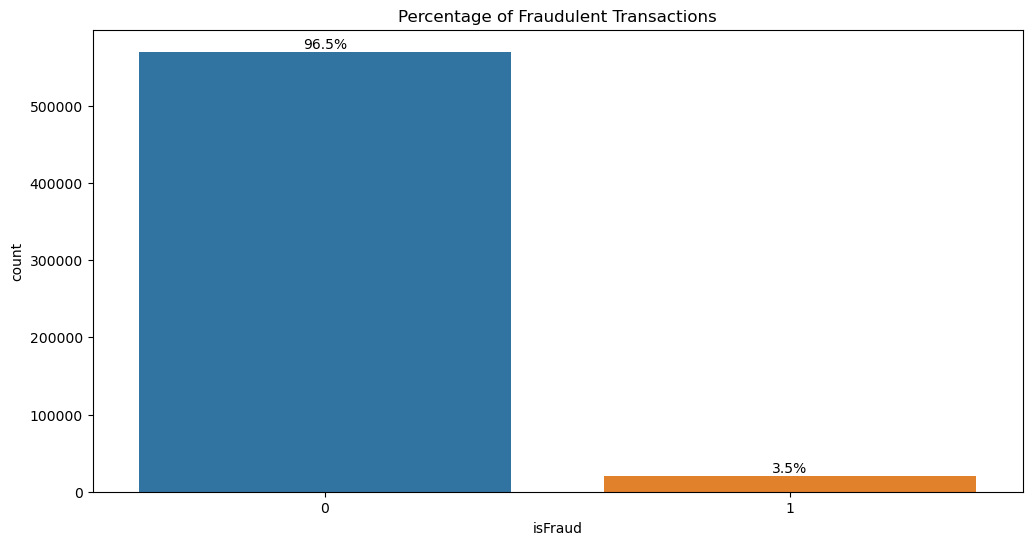

In [13]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(data=merged_train, x='isFraud')

total = len(merged_train['isFraud'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Percentage of Fraudulent Transactions')
plt.show()

##### The data is highly imbalanced as only about 3.5% are fraud transactions, and the remaining 96.5 % are non fraudulent transactions

### TransactionDT

This is timedelta from a given reference datetime,
- TransactionDT is useful to extract information such as year, month,week, date and time , which can be used to understand the trend of fraudulent transactions

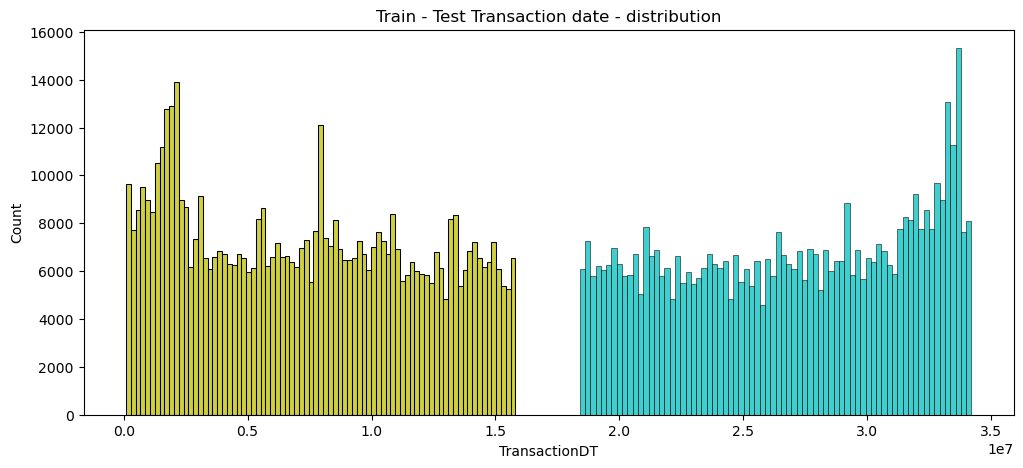

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,5))
sns.histplot(merged_train['TransactionDT'],color = 'y')
sns.histplot(merged_test['TransactionDT'],color='c')
axes.title.set_text('Train - Test Transaction date - distribution')
plt.show()

- There is a slight gap between training and test set,which indicates that the training set is from an earlier period of time and test is from a later period of time. This will impact train validation split.
- There are certain days on which number of transactions exceed 10000
- Test data has the highest number of transactions on a particular day

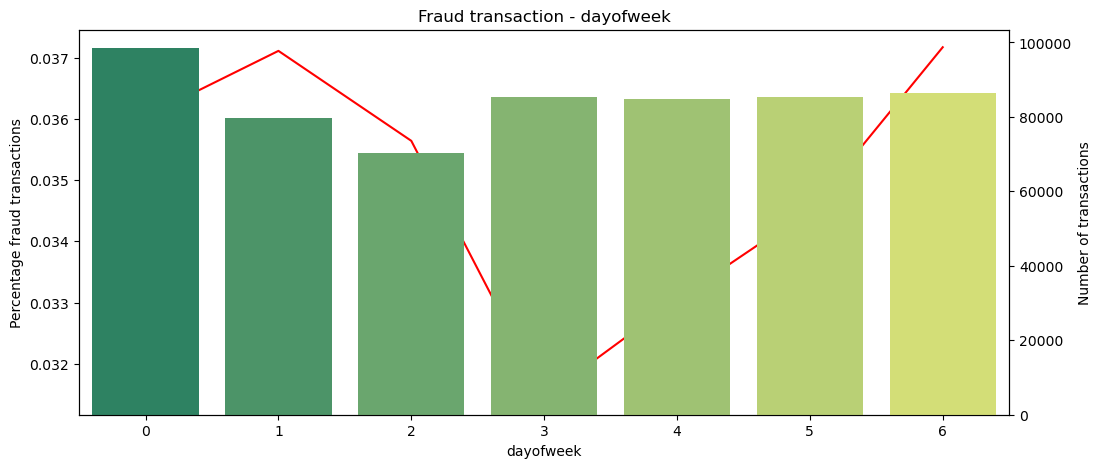

In [23]:
merged_train['dayofweek'] = (merged_train['TransactionDT']//(60*60*24)-1)%7
tmp = merged_train[['isFraud','dayofweek']].groupby(by=['dayofweek']).mean().reset_index() \
            .rename(columns={'isFraud':'Percentage fraud transactions'})

tmp_count = merged_train[['TransactionID','dayofweek']].groupby(by=['dayofweek']).count().reset_index() \
            .rename(columns={'TransactionID':'Number of transactions'})
tmp = tmp.merge(tmp_count,on=['dayofweek'])




fig, axes = plt.subplots(figsize=(12,5))
axes = sns.lineplot(x=tmp['dayofweek'],y=tmp['Percentage fraud transactions'],color='r')
axes2 = axes.twinx()
axes2 = sns.barplot(x=tmp['dayofweek'],y=tmp['Number of transactions'],palette='summer')
axes.set_title('Fraud transaction - dayofweek')
plt.show()

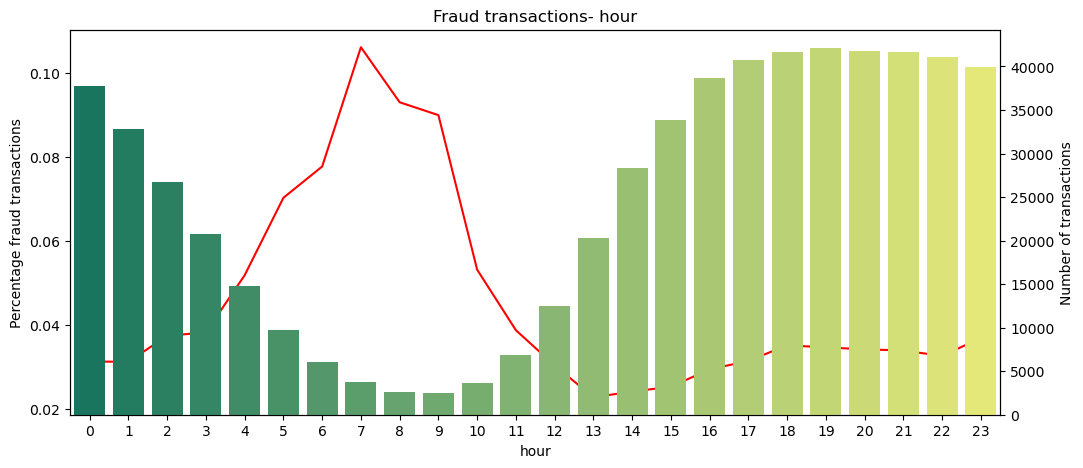

In [24]:
merged_train['hour'] = (merged_train['TransactionDT']//(60*60))%24
tmp = merged_train[['isFraud','hour']].groupby(by=['hour']).mean().reset_index() \
            .rename(columns={'isFraud':'Percentage fraud transactions'})

tmp_count = merged_train[['TransactionID','hour']].groupby(by=['hour']).count().reset_index() \
            .rename(columns={'TransactionID':'Number of transactions'})
tmp = tmp.merge(tmp_count,on=['hour'])




fig, axes = plt.subplots(figsize=(12,5))
axes = sns.lineplot(x=tmp['hour'],y=tmp['Percentage fraud transactions'],color='r')
axes2 = axes.twinx()
axes2 = sns.barplot(x=tmp['hour'],y=tmp['Number of transactions'],palette='summer')
axes.set_title('Fraud transactions- hour')
plt.show()


Points we infer from these graphs are 
- Fraud rate decreases in the afternoon and is highest in the morning
- Fraud rate tends to increase from the beginning of the week, tends to decrease on Friday and Sunday.

### TransactionAmt

- This is the amount associated with each transaction. We dont have any missing values for the field.

In [25]:
merged_train['TransactionAmt'].isnull().sum()

0

In [26]:
merged_test['TransactionAmt'].isnull().sum()

0

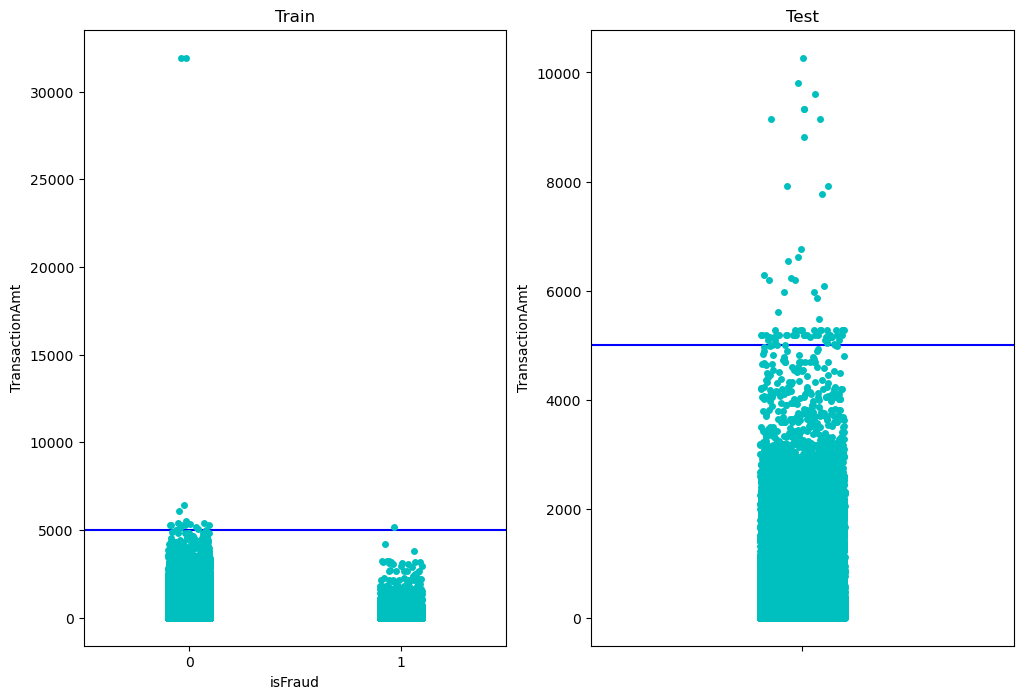

In [31]:
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.stripplot(y='TransactionAmt', x='isFraud', data=merged_train, color = 'c')
plt.axhline(5000, color='b')
plt.title('Train')

plt.subplot(122)
sns.stripplot(y='TransactionAmt', data=merged_test,color='c')
plt.axhline(5000, color='b')
plt.title('Test');

There is no transaction having a transaction amount of more than 5000, in train data, the nonfraudulent transaction amount does not exceed 10000, where as the fraudulent transaction hardly reaches 5000

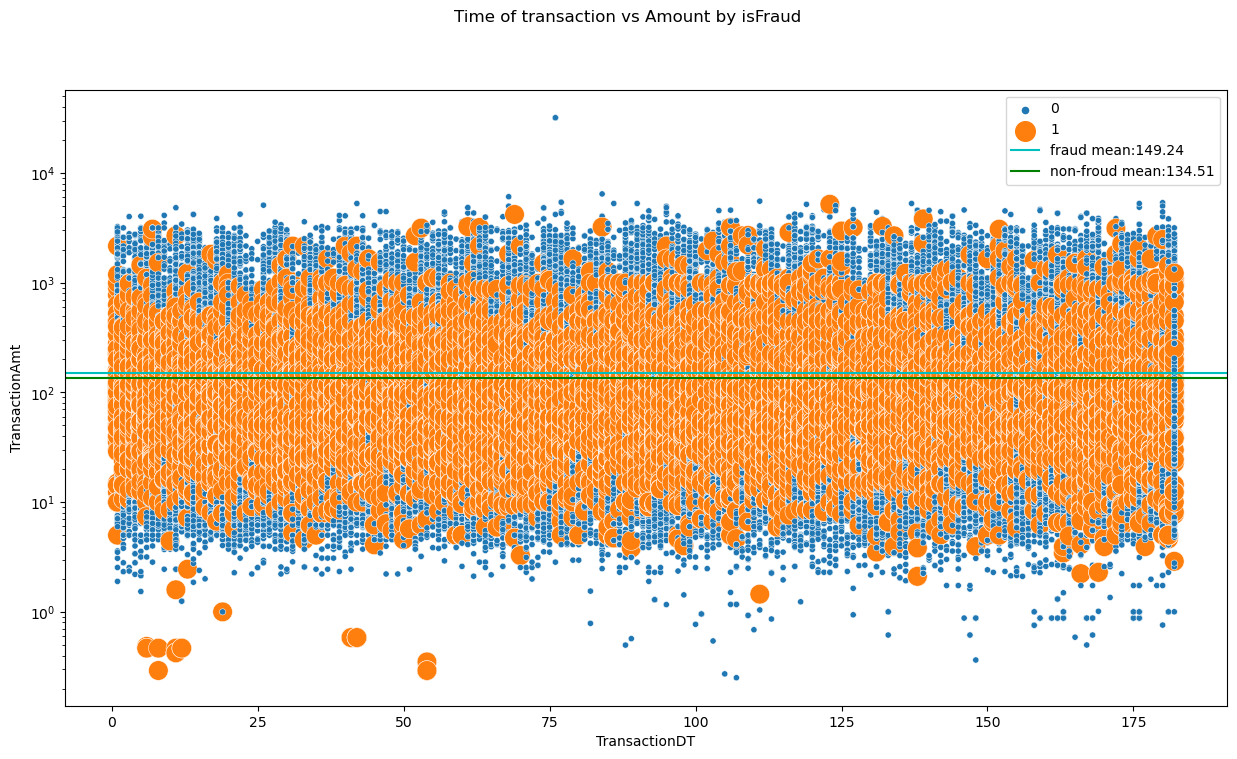

In [35]:
plt.figure(figsize=(15,8))
plt.suptitle('Time of transaction vs Amount by isFraud')
fraud_mean, nonfraud_mean = merged_train[merged_train.isFraud==1]['TransactionAmt'].mean(), merged_train[merged_train.isFraud==0]['TransactionAmt'].mean()
sns.scatterplot(x=merged_train['TransactionDT']//(3600*24), y=merged_train['TransactionAmt'], data=merged_train, hue='isFraud', size="isFraud", sizes=(200, 20))
plt.axhline(y=fraud_mean ,color='c',label=f'fraud mean:{round(fraud_mean,2)}')
plt.axhline(y=nonfraud_mean, color='green',label=f'non-froud mean:{round(nonfraud_mean,2)}')
plt.legend()

plt.yscale('log')
plt.show()

The average of the fraud transactions(149.24) is bigger than the average of the non-fraud transactions(134.26).

### ProductCD

productcode associated with each transaction

In [37]:
merged_train['ProductCD'].isnull().sum()

0

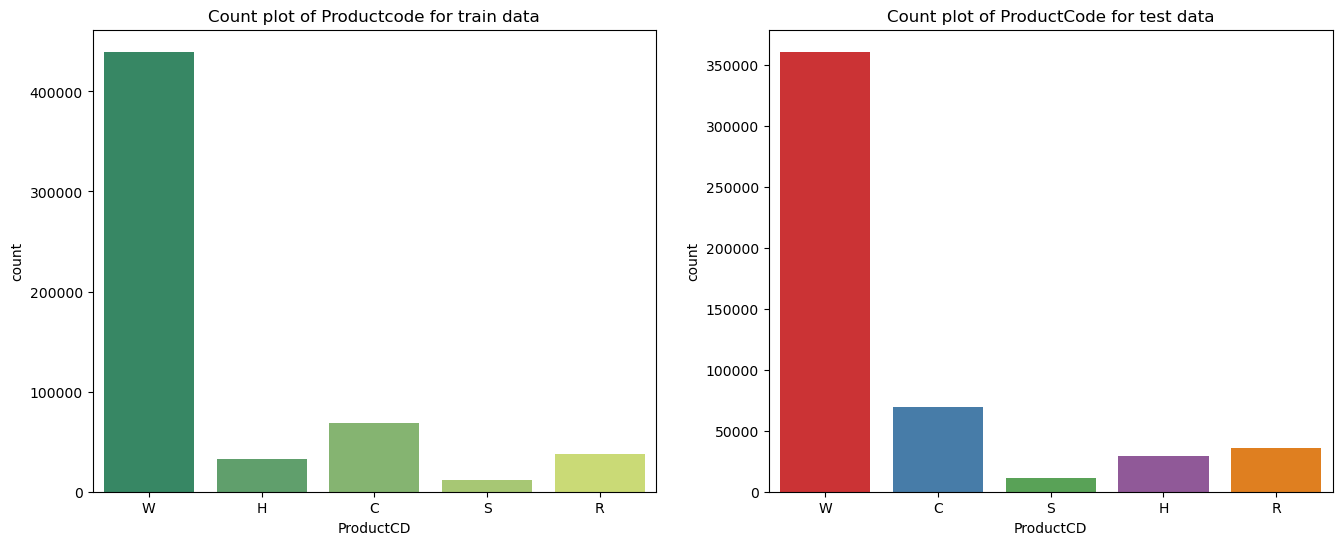

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for df_train
sns.countplot(data=merged_train, x='ProductCD', palette='summer', ax=axes[0])
axes[0].set_title('Count plot of Productcode for train data')

# Plot for df_test
sns.countplot(data=merged_test, x='ProductCD', palette='Set1', ax=axes[1])
axes[1].set_title('Count plot of ProductCode for test data')
plt.show()

The following graphs shows the count of different kinds of products for traina nd test data,
- We can infer that W has the maximum count in both train and test data
- There is variation in the count of C , H and S products

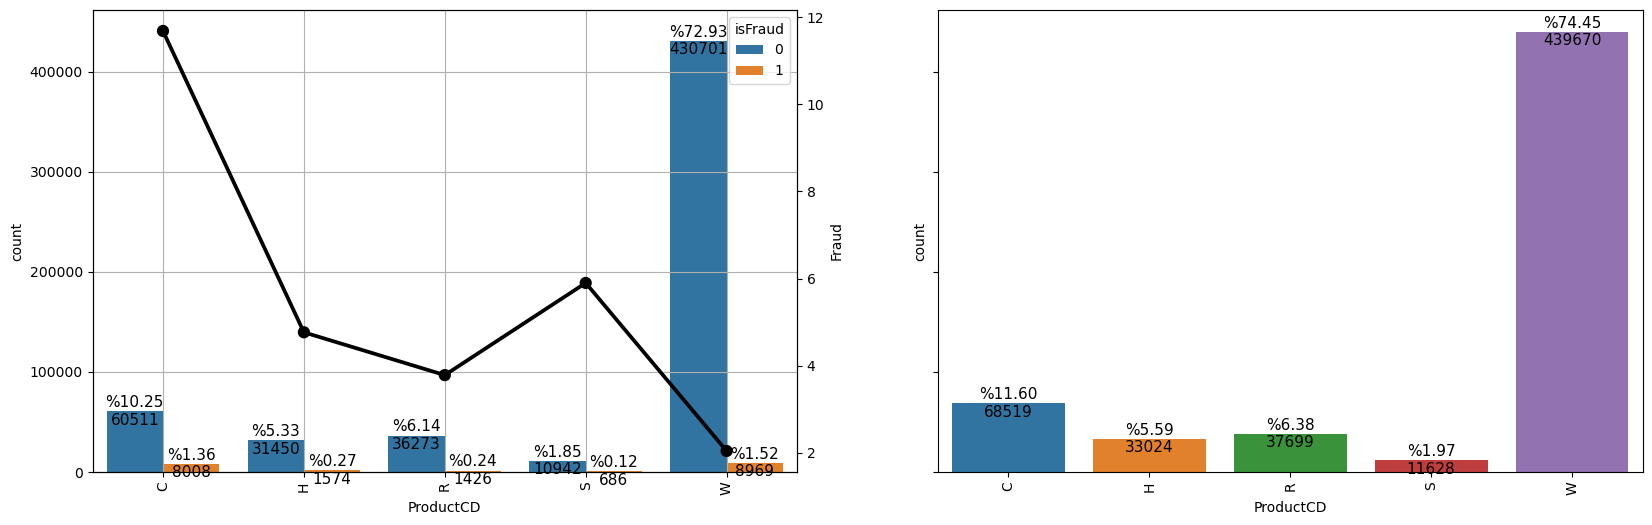

In [52]:
def labels(ax, df, xytext=(0, 0)):
    for bar in ax.patches: 
        ax.annotate('%{:.2f}\n{:.0f}'.format(100*bar.get_height()/len(df),bar.get_height()), (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                    size=11, xytext=xytext, 
                    textcoords='offset points')


def plot_col(col, df, figsize=(20,6)):

    fig, ax = plt.subplots(1,2,figsize=figsize, sharey=True)

    plt.subplot(121)
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

    ax[0] = sns.countplot(x=col, data=df, hue='isFraud', 
                  order=np.sort(df[col].dropna().unique()),
                  )
    ax[0].tick_params(axis='x', rotation=90)
    labels(ax[0],df[col].dropna(),(0, 0))
    
    ax_twin = ax[0].twinx()
    ax_twin = sns.pointplot(x=col, y='Fraud', data=tmp, color='black', 
                  order = np.sort(df[col].dropna().unique()))
    

    ax[0].grid()

    plt.subplot(122)
    ax[1] = sns.countplot(x=df[col].dropna(),
                  order= np.sort(df[col].dropna().unique()),
                  )
    ax[1].tick_params(axis='x', rotation=90)
    labels(ax[1],df[col].dropna())
    plt.show()
plot_col('ProductCD', df=merged_train)


- ProductCD W is being used more thus it has maximum percentage of transactions, with 73 % for non fraud cases, and 1.52 % for fraud cases
- Second highest used productCode is C, with 10.2 % used for non - fraudulent cases and 1/36 % for fraudulent cases

### Card 1-6

Stores payment card related information like card type, country.These features are categorical.

In [56]:
cards = [col for col in merged_train.columns if 'card' in col]
merged_train[cards].head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


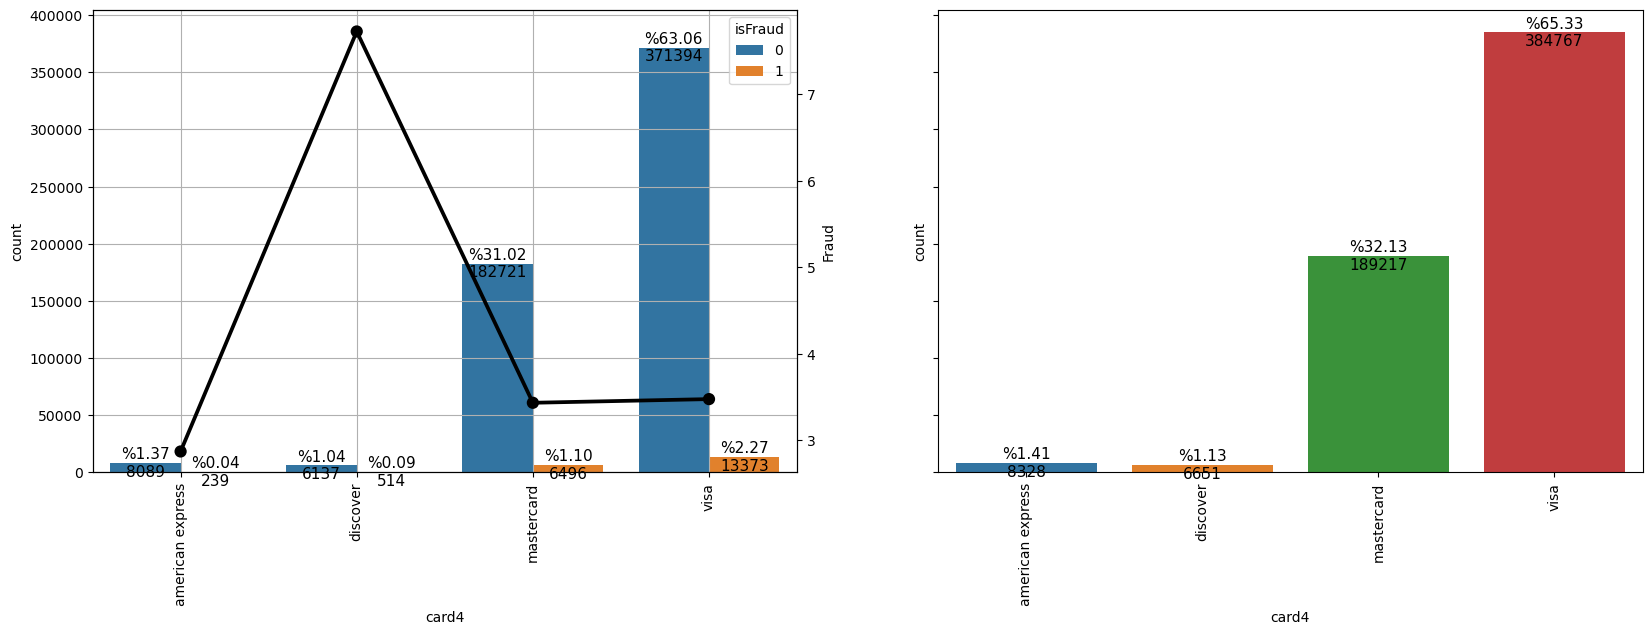

In [59]:
plot_col('card4', df=merged_train)

- We can infer that Visa Card is the most used card for transactions, with about 63% being used for fraudulent transactions.
- MasterCard is the second most used card with 31% being used for fraudulent transactions, others are less than 3
%

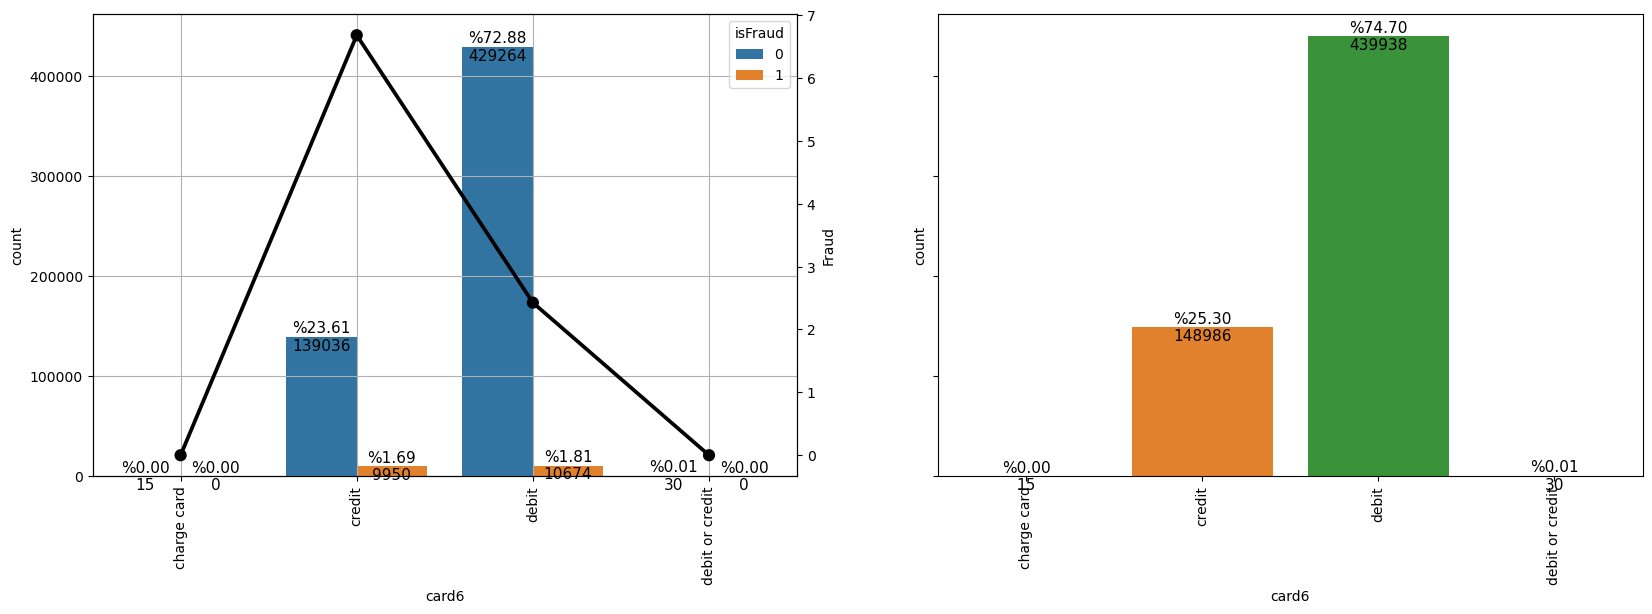

In [60]:
plot_col('card6', df = merged_train)

- Debit card is used, 75 % of the time by customers for transactions,credit card is used in other cases, with the rate of frauds higher in credit cards

### P_emailDomain and R_emailDomain

Email domain of purchaser and email domain of recepiant

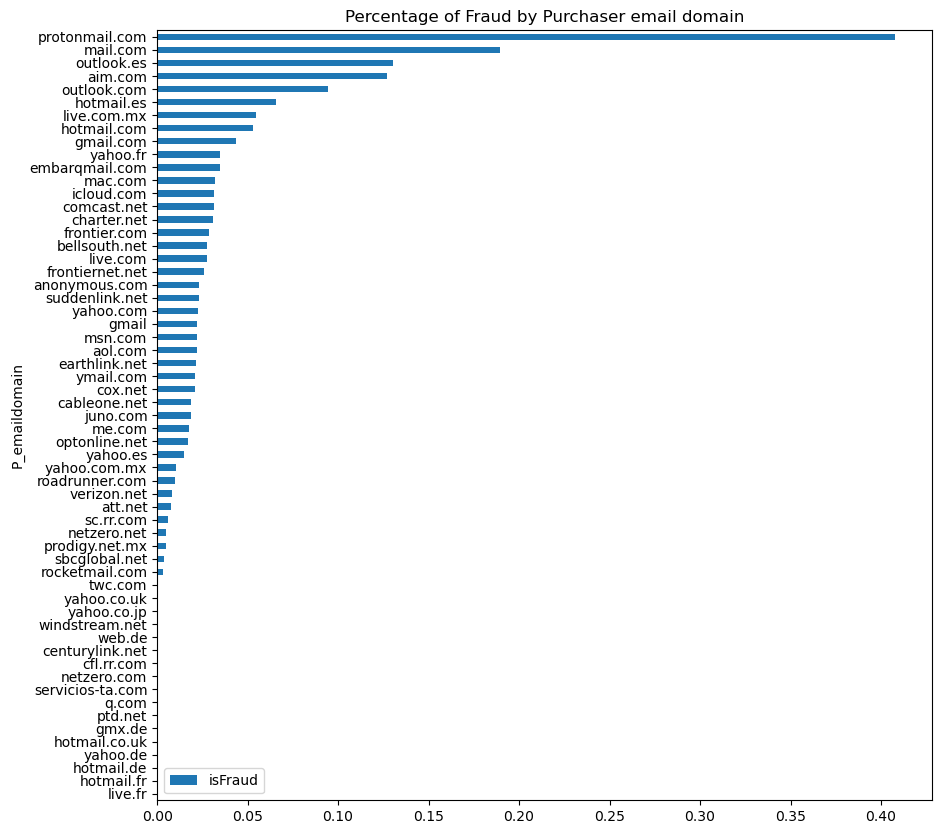

In [76]:
merged_train[['P_emaildomain','isFraud']].groupby(by=['P_emaildomain']).mean() \
        .sort_values(by=['isFraud']).plot(kind='barh',
        figsize=(10, 10),
         title='Percentage of Fraud by Purchaser email domain')
plt.show()


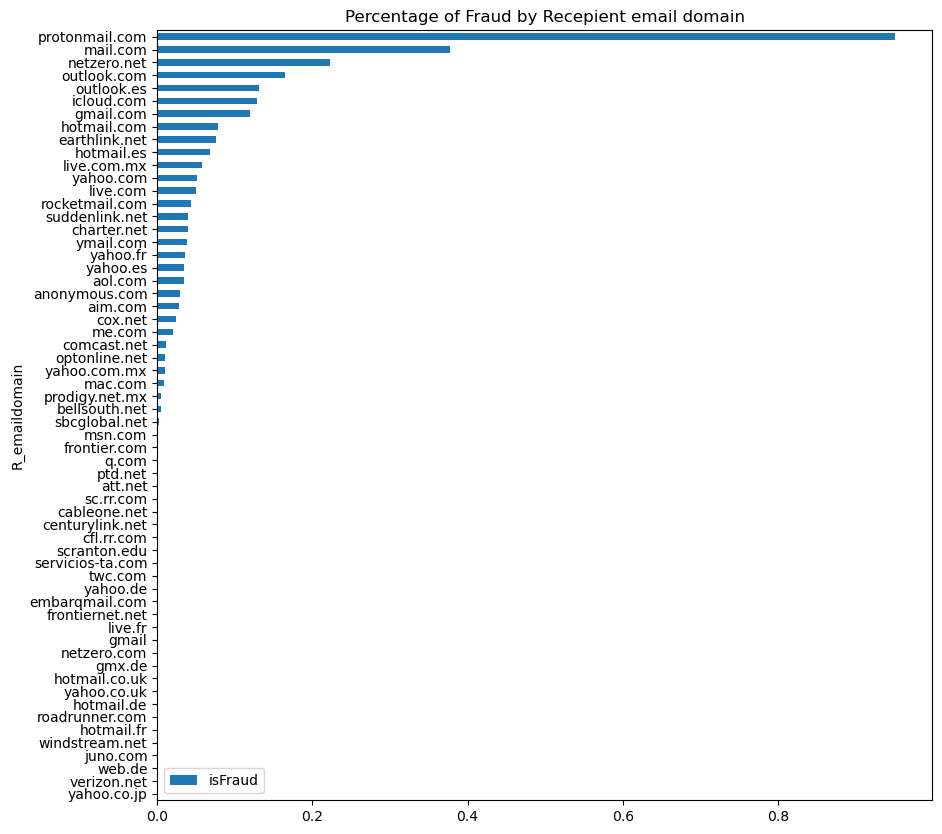

In [77]:
merged_train[['R_emaildomain','isFraud']].groupby(by=['R_emaildomain']).mean() \
        .sort_values(by=['isFraud']).plot(kind='barh',
        figsize=(10, 10),
         title='Percentage of Fraud by Recepient email domain')
plt.show()


-We infer that more fraudaulent transactions come from domain name 'protonmail.com' which is more than 40%.

### Addr1, Addr2

Categorical data giving address information

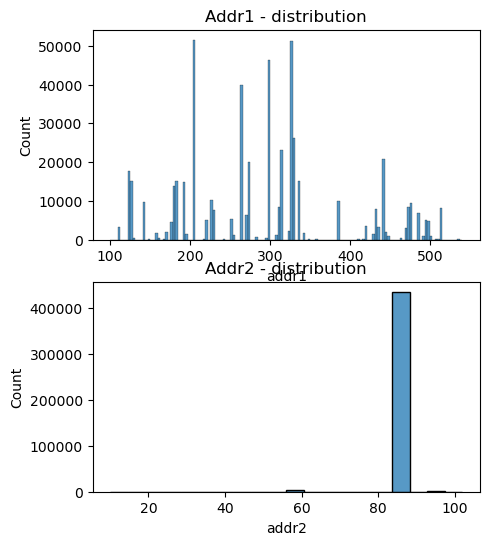

In [72]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(5,6))
sns.histplot(merged_train['addr1'],ax=axes[0])
sns.histplot(merged_test['addr2'],ax=axes[1])
axes[0].title.set_text('Addr1 - distribution')
axes[1].title.set_text('Addr2 - distribution')
plt.show()

### M1-M9

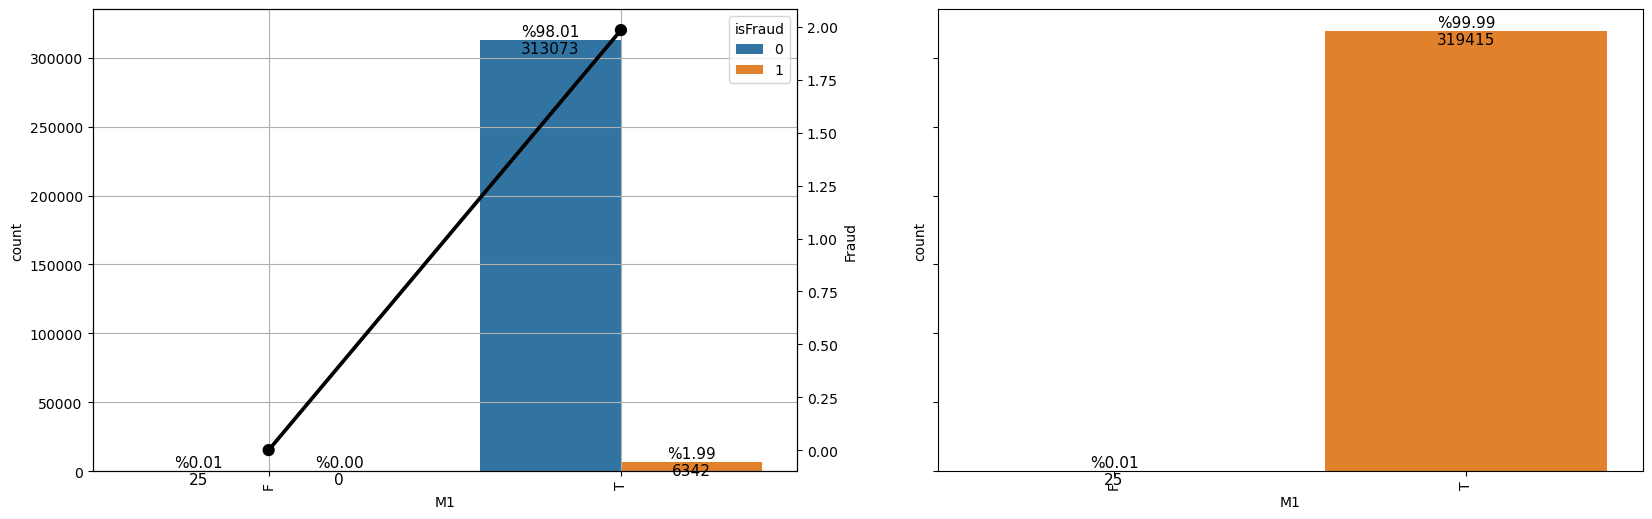

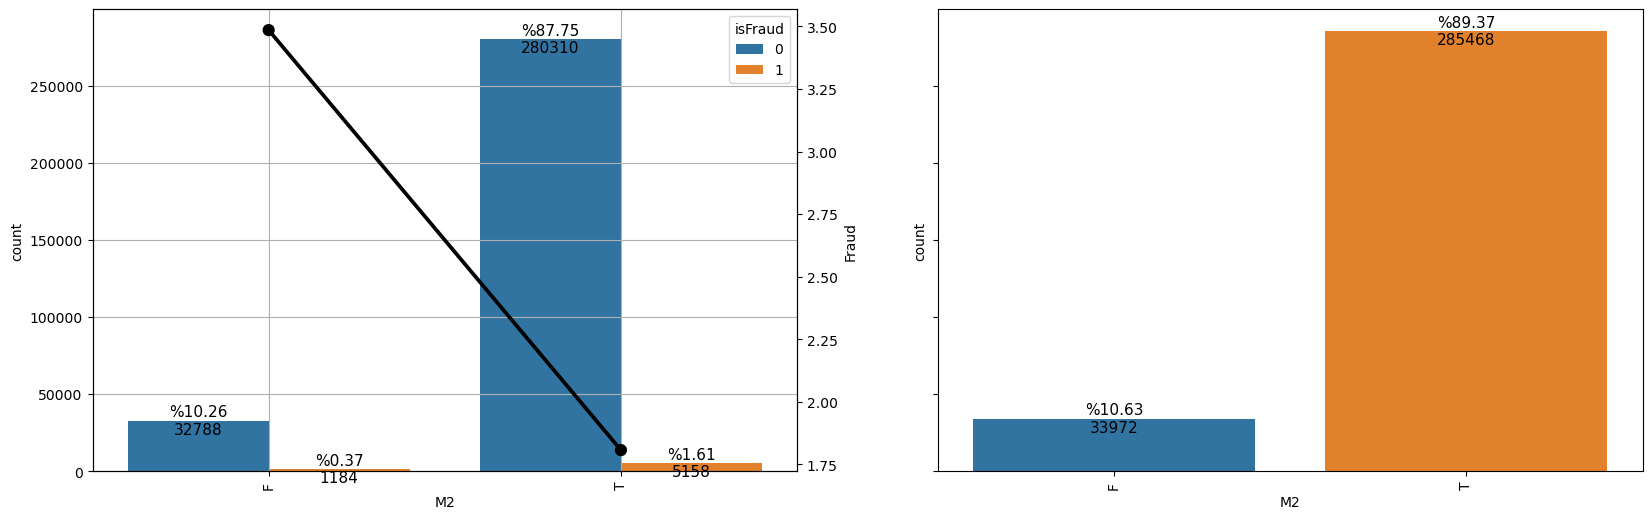

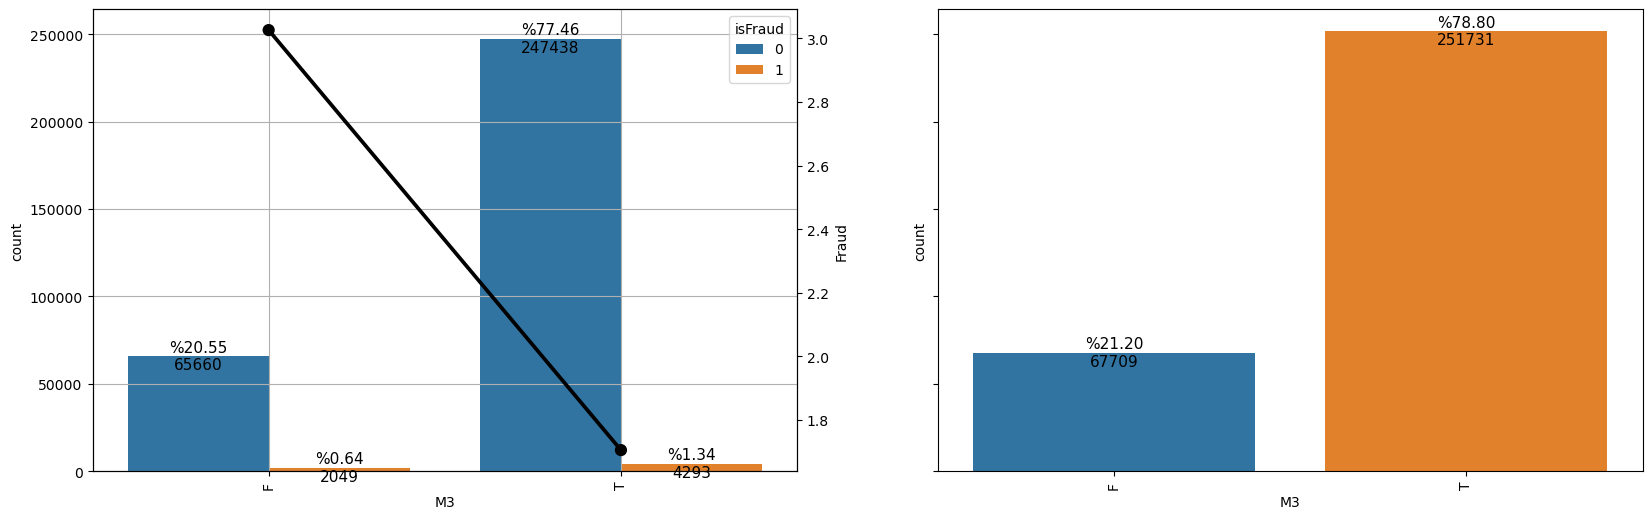

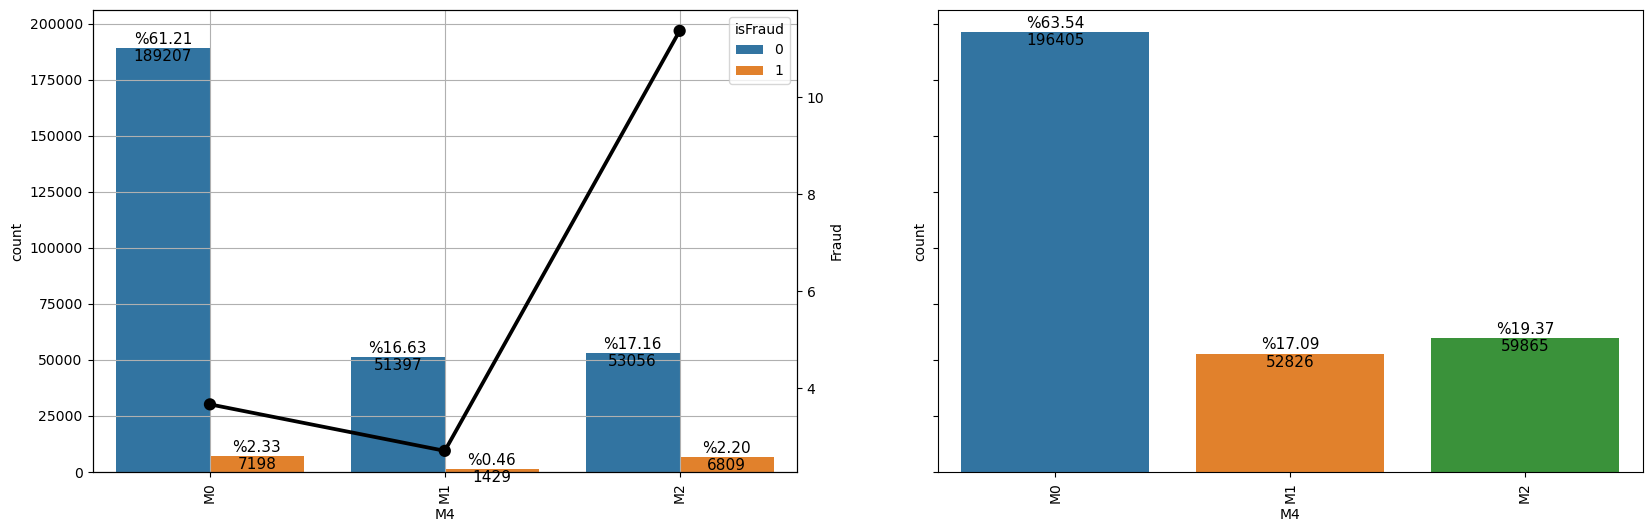

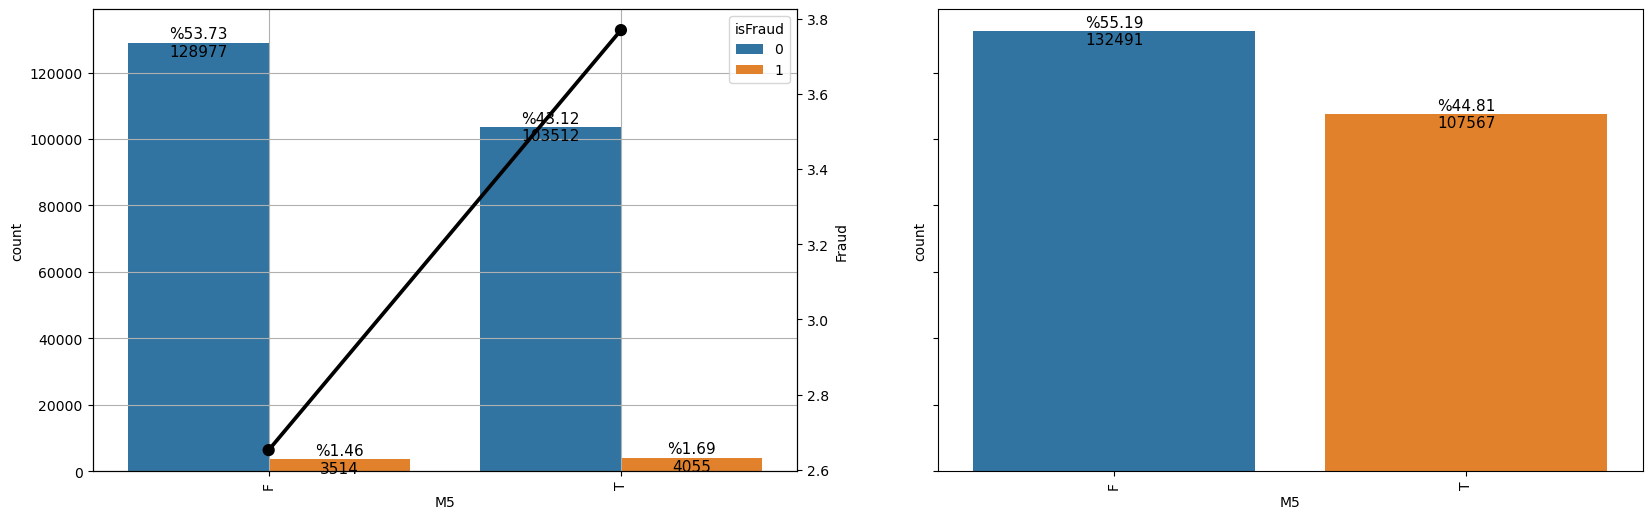

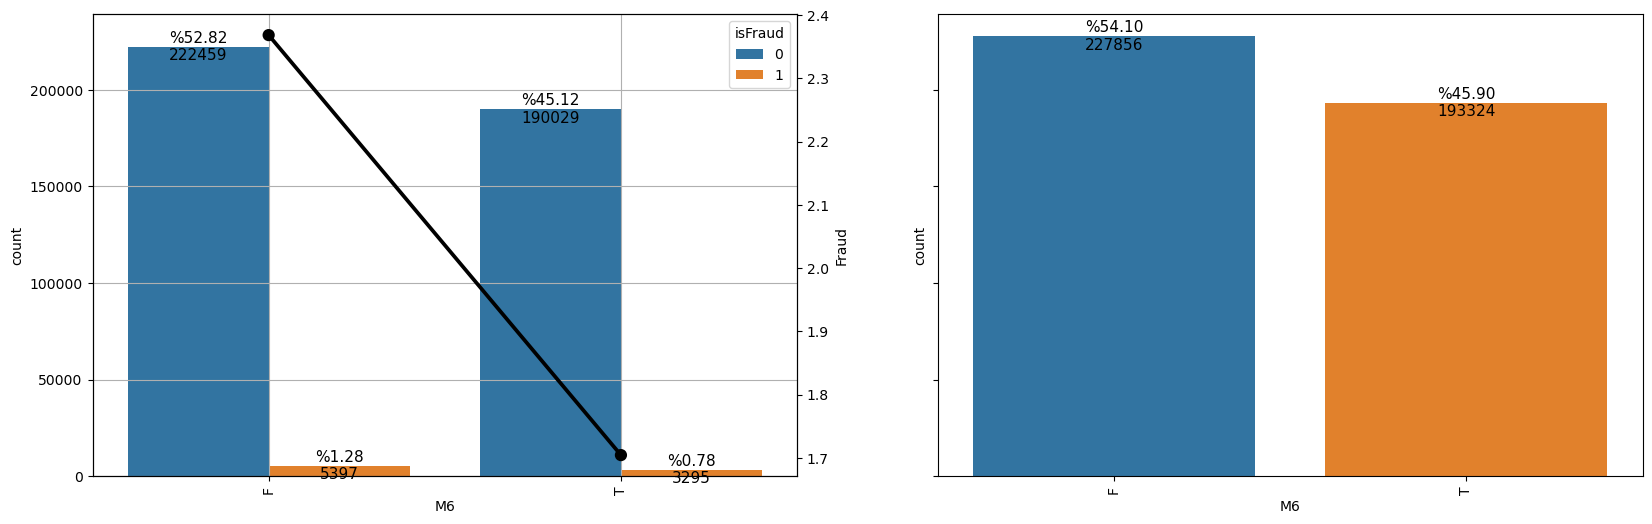

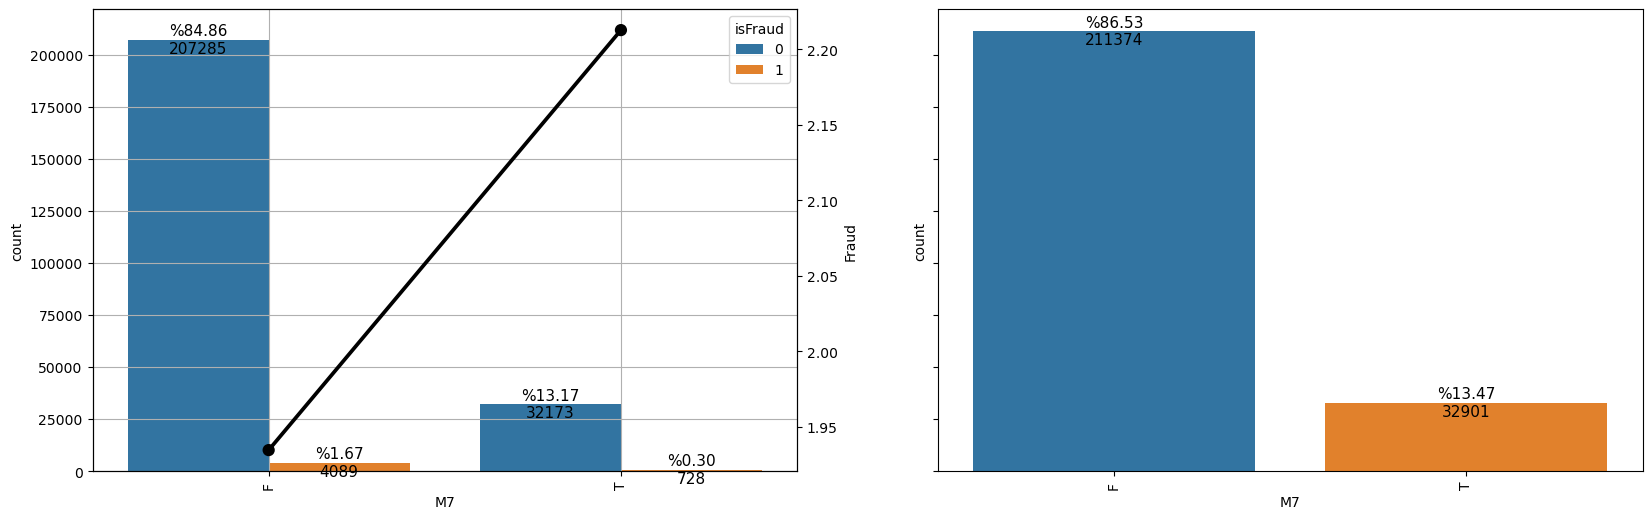

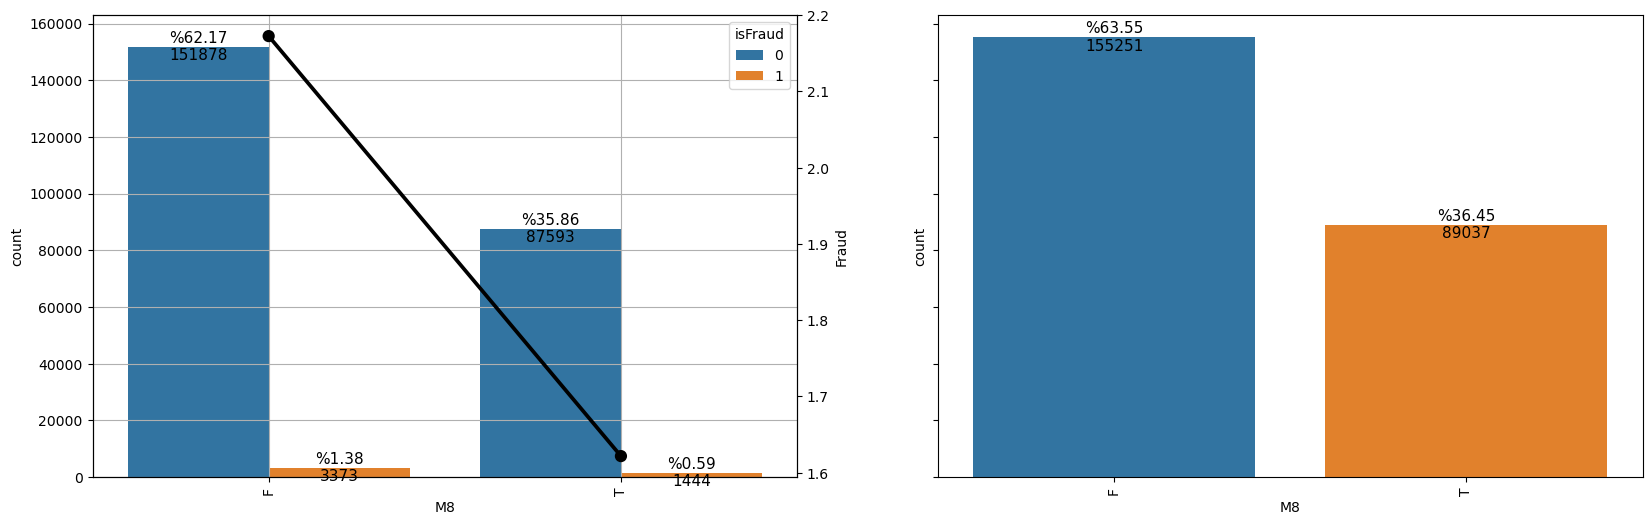

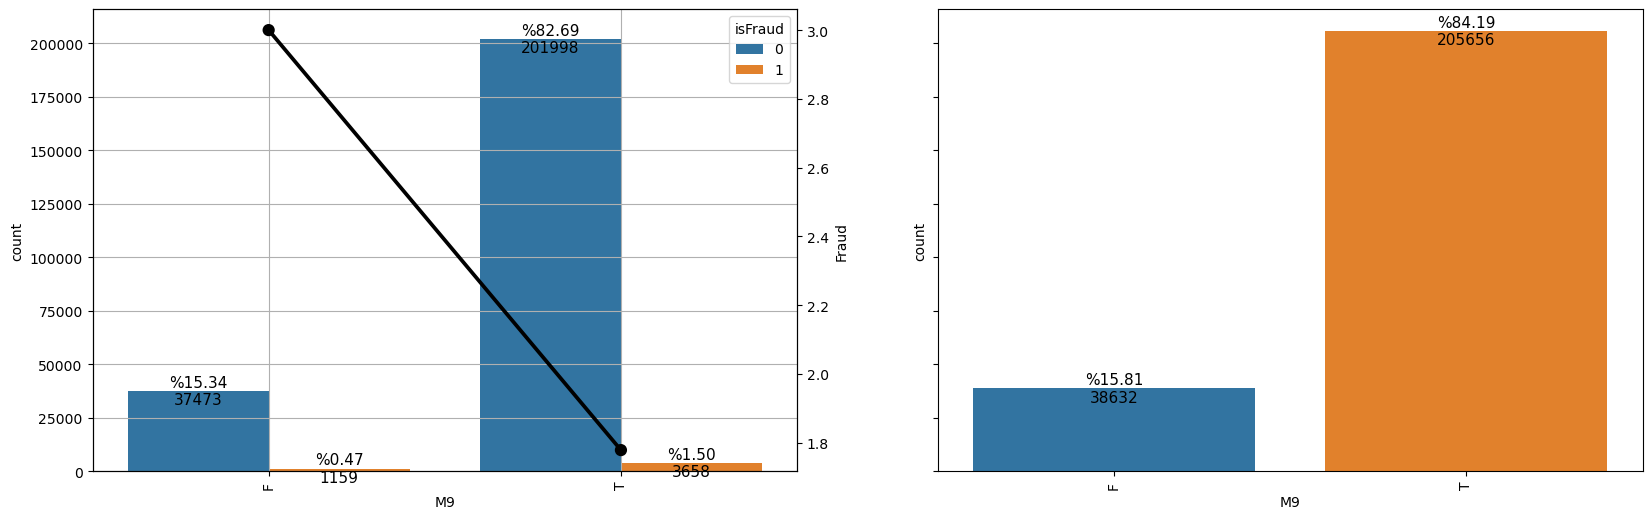

In [79]:
m_cols = [m for m in merged_train.columns if m[0] == 'M']

for col in m_cols:
    plot_col(col, df = merged_train)
    plt.show()

In M1 of all cases of T, 2% are fraudulant
In M2 of all cases of F, 0.37% are fraudulant
Similar readings can be obtained from above graphs

### DeviceType

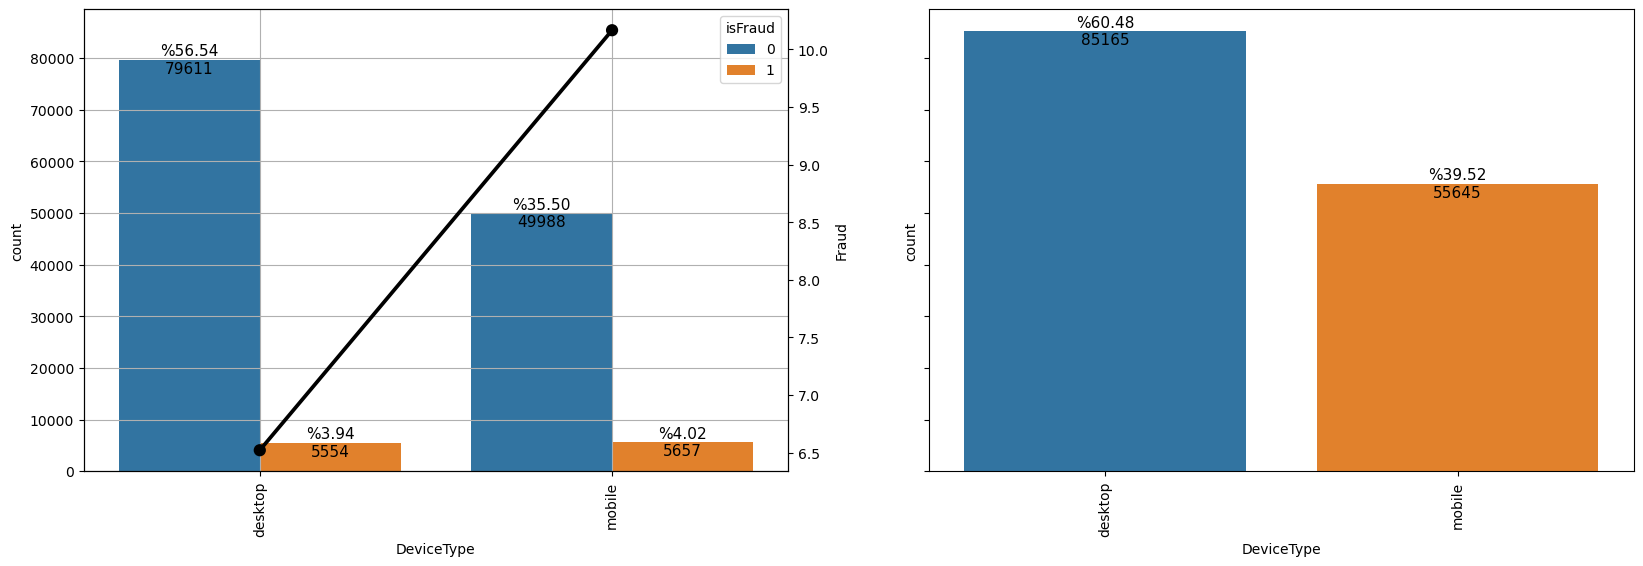

In [81]:
plot_col('DeviceType',merged_train)

-We can infer that fraudulent transactions mostly occur on mobile, though desktop is mostlt used for transactions

### DeviceInfo

In [82]:
tmp = merged_train[['DeviceInfo','isFraud']].groupby(by=['DeviceInfo']).mean().sort_values(by='isFraud',ascending=False)
print(tmp[tmp['isFraud'] > 0.9].shape)
tmp[tmp['isFraud'] > 0.9]

(49, 1)


,isFraud
DeviceInfo,
ZTE-Z835,1.000000
Dream,1.000000
SM-T285M,1.000000
A5002,1.000000
A466BG,1.000000
SM-T530,1.000000
Blade L3 Build/KOT49H,1.000000
RNE-L23 Build/HUAWEIRNE-L23,1.000000
SAMSUNG-SM-N900A,1.000000


### Id 12- 38

These are categorical data. It contains network connection information,browser information etc

In [97]:
for column in merged_train.columns[merged_train.columns.str.startswith('id_')]:
    missing_percentage = merged_train[column].isnull().sum().mean() * 100 / len(merged_train)
    print(f"Column {column}: Missing Percentage = {missing_percentage:.2f}%")

Column id_01: Missing Percentage = 75.58%
Column id_02: Missing Percentage = 76.15%
Column id_03: Missing Percentage = 88.77%
Column id_04: Missing Percentage = 88.77%
Column id_05: Missing Percentage = 76.82%
Column id_06: Missing Percentage = 76.82%
Column id_07: Missing Percentage = 99.13%
Column id_08: Missing Percentage = 99.13%
Column id_09: Missing Percentage = 87.31%
Column id_10: Missing Percentage = 87.31%
Column id_11: Missing Percentage = 76.13%
Column id_12: Missing Percentage = 75.58%
Column id_13: Missing Percentage = 78.44%
Column id_14: Missing Percentage = 86.45%
Column id_15: Missing Percentage = 76.13%
Column id_16: Missing Percentage = 78.10%
Column id_17: Missing Percentage = 76.40%
Column id_18: Missing Percentage = 92.36%
Column id_19: Missing Percentage = 76.41%
Column id_20: Missing Percentage = 76.42%
Column id_21: Missing Percentage = 99.13%
Column id_22: Missing Percentage = 99.12%
Column id_23: Missing Percentage = 99.12%
Column id_24: Missing Percentage =

-We can infer that almost all the ids have null values of more than 70 %

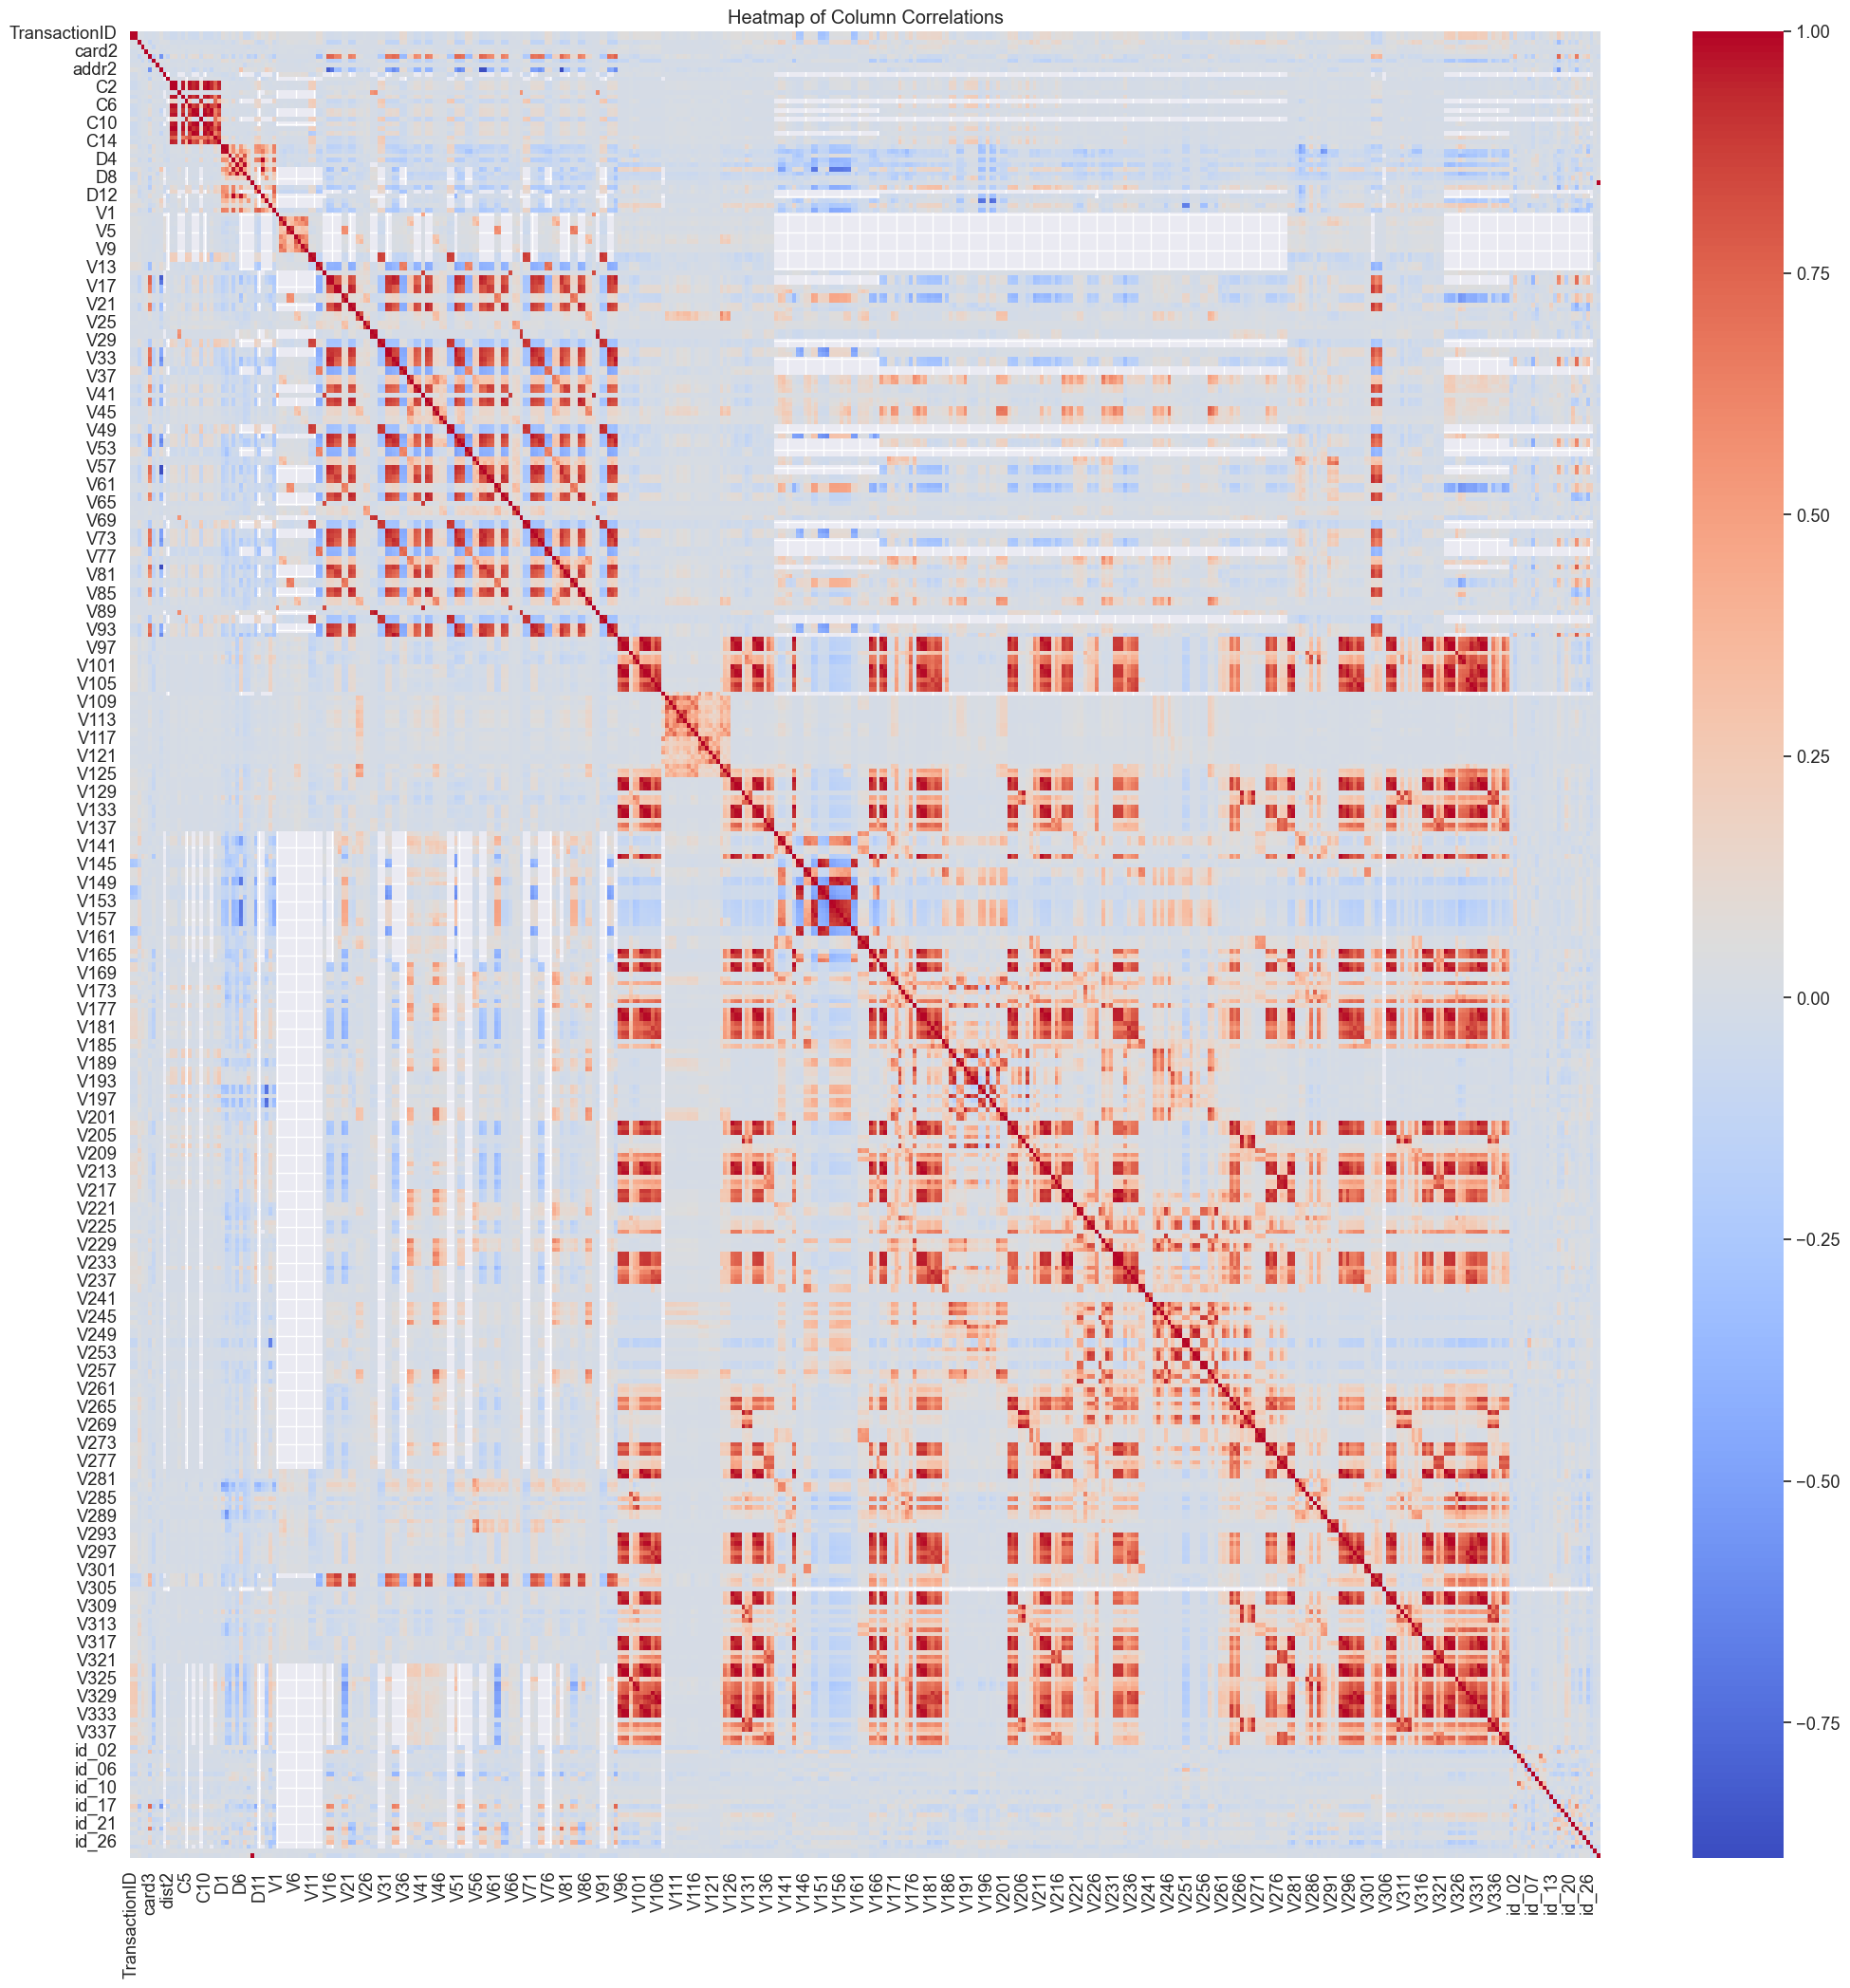

In [113]:
correlation_matrix = merged_train.drop('isFraud',axis=1).corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, cmap='coolwarm')

plt.title('Heatmap of Column Correlations')
plt.show()

- we can see high correlation between c2-c6 and among V columns